## Imports and Load Data

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

#you'll need to pip install helpers. the code is very well documented at pip install https://bitbucket.org/yymao/helpers/get/master.zip
from helpers.SimulationAnalysis import SimulationAnalysis, iterTrees
from helpers.SimulationAnalysis import readHlist

In [3]:
#Halo properties to load; see Section 2.4 of https://arxiv.org/abs/2008.08591 for info on Rockstar fields 
fields = ['scale','id', 'upid', 'pid', 'mvir', 'mpeak', 'rvir', 'vmax', 'vpeak', 'x', 'y', 'z', 'M200c', 
          'depth_first_id','scale_of_last_MM']

#Load z = 0 hlist for m12i
halos_z0 = readHlist('../m12i_res7100/hlist_1.00000.list',fields=fields)
host_halo = halos_z0[np.argmax(halos_z0['mvir'])]
subhalos_z0 = halos_z0[halos_z0['upid']==host_halo['id']]

#Load z = 0 hlist for m12i_dm
halos_z0_dm = readHlist('../m12i_res7100_dm/hlist_1.00000.list',fields=fields)
host_halo_dm = halos_z0_dm[np.argmax(halos_z0_dm['mvir'])]
subhalos_z0_dm = halos_z0_dm[halos_z0_dm['upid']==host_halo_dm['id']]

In [4]:
halos_z0.dtype

dtype([('scale', '<f8'), ('id', '<i4'), ('upid', '<i4'), ('pid', '<i4'), ('mvir', '<f8'), ('mpeak', '<f8'), ('rvir', '<f8'), ('vmax', '<f8'), ('vpeak', '<f8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('M200c', '<f8'), ('depth_first_id', '<i4'), ('scale_of_last_MM', '<f8')])

In [7]:
#apply a resolution cut to remove poorly resolved halos
halos_z0_short = halos_z0[halos_z0['vpeak']>10.]
subhalos_z0_short = subhalos_z0[subhalos_z0['vpeak']>10.]

halos_z0_dm_short = halos_z0_dm[halos_z0_dm['vpeak']>10.]
subhalos_z0_dm_short = subhalos_z0_dm[subhalos_z0_dm['vpeak']>10.]

### Visualizing the Subhalo Populations

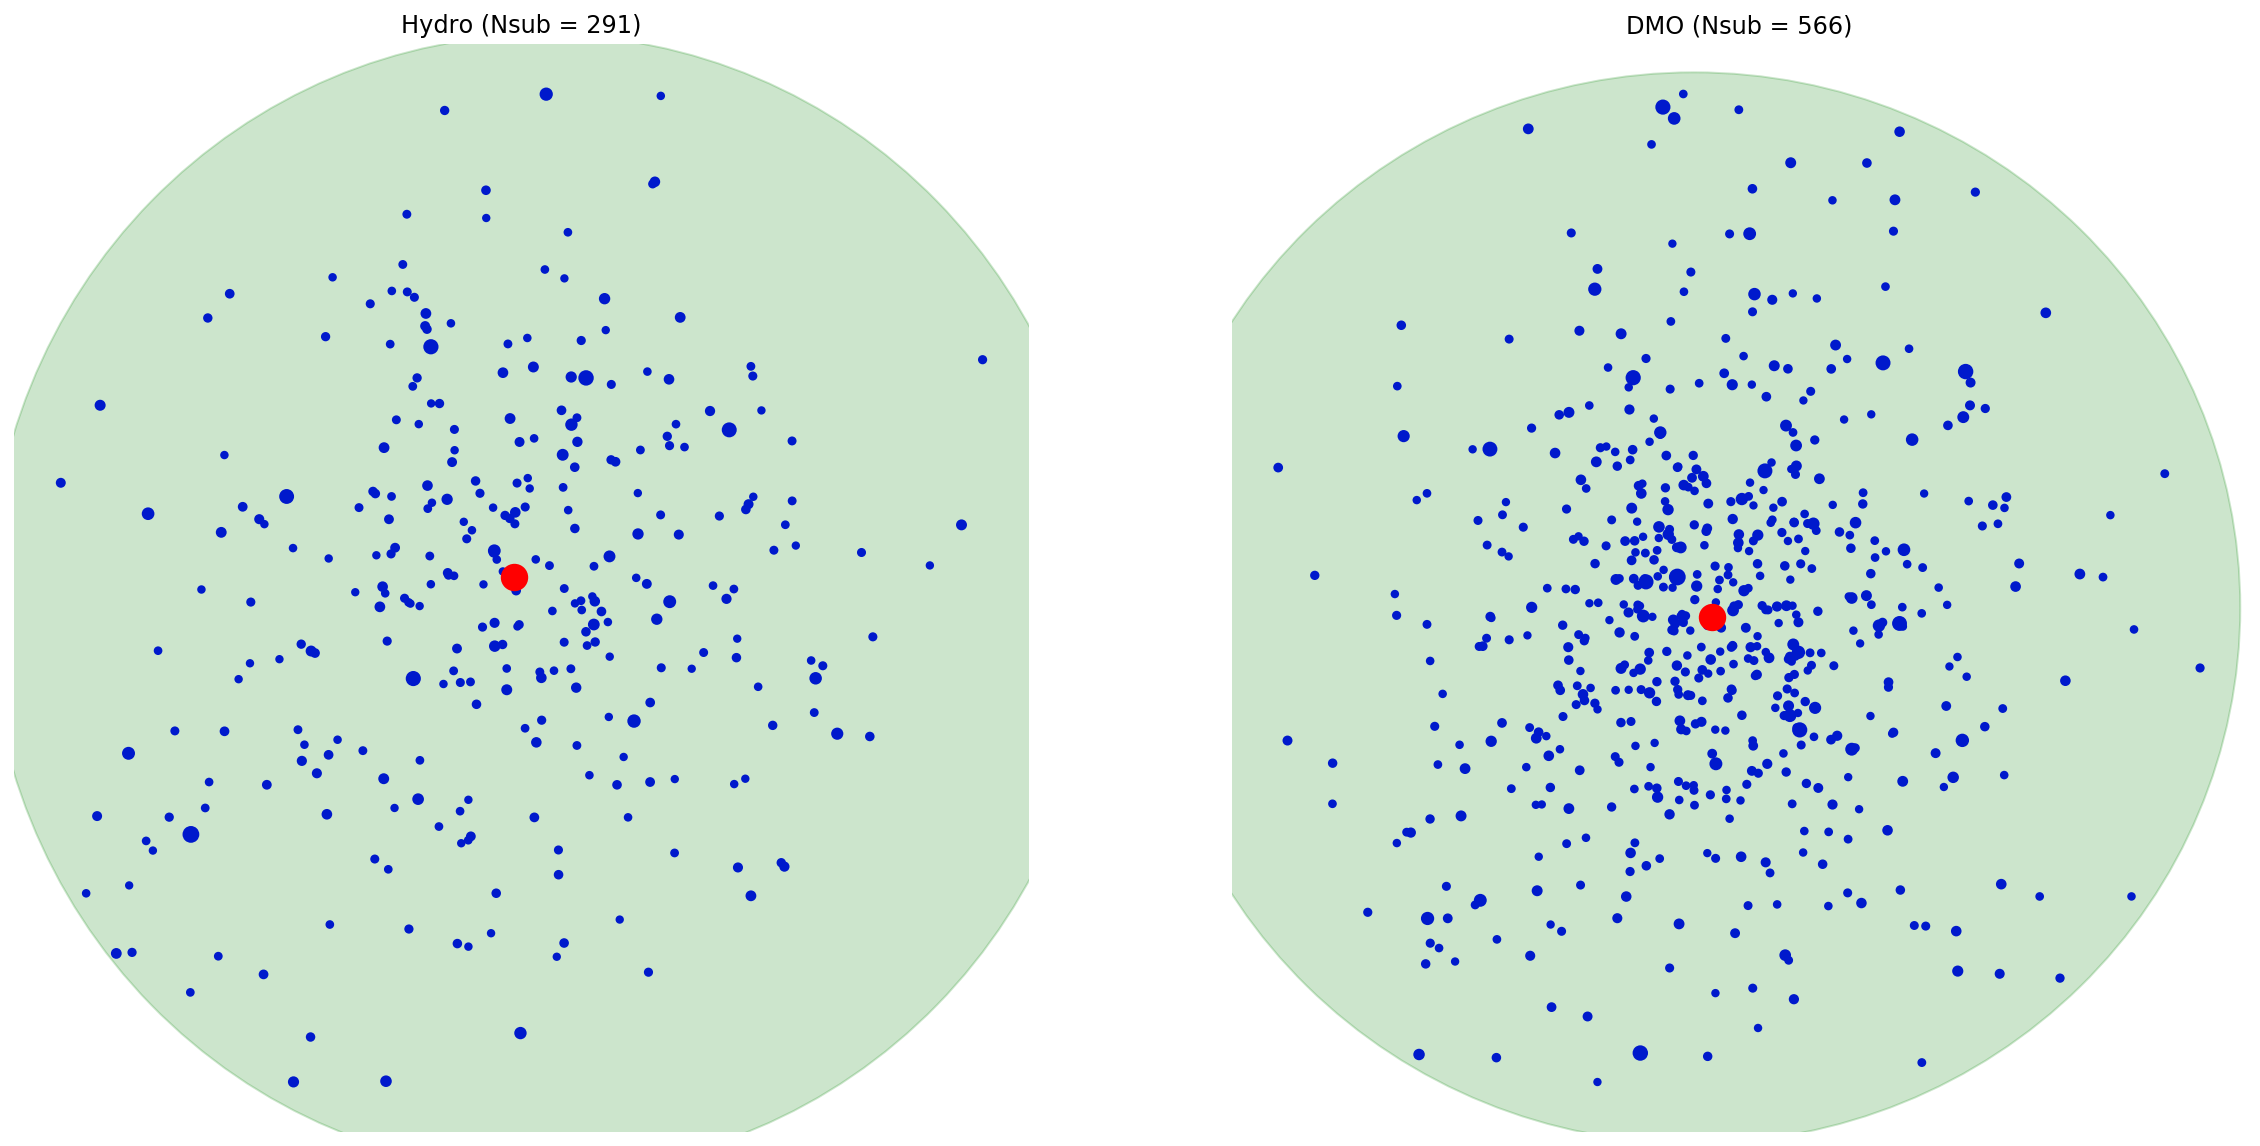

In [8]:
host_halo['rvir'] # viral radius
host_halo_dm['rvir']
b = 0.001 #conversion factor from Kpc to Mpc
host_halo['rvir']*b # radius in Mpc
host_halo_dm['rvir']*b


circle1 = plt.Circle((29.35,30.97),host_halo['rvir']*b,color='green',alpha=0.2) #Creating a Circle for the viral radius.
circle2 = plt.Circle((29.35,31.0), host_halo_dm['rvir']*b,color='green', alpha=0.2) #Create a Circle for the viral radius dm

f, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.axis('off')#suppressing the axis
ax2.axis('off')#suppressing the axis


ax1.scatter(host_halo['x'],host_halo['y'],c='r',s=host_halo['vpeak'],zorder=999)
ax1.scatter(subhalos_z0_short['x'],subhalos_z0_short['y'],c='b',s=subhalos_z0_short['vpeak']) 
ax1.set_title('Hydro (Nsub = {})'.format(len(subhalos_z0_short)))
ax1.add_patch(circle1)#adding the circle to graph 1

ax2.scatter(host_halo_dm['x'],host_halo_dm['y'],c='r',s=host_halo['vpeak'],zorder=999)
ax2.scatter(subhalos_z0_dm_short['x'],subhalos_z0_dm_short['y'],c='b',s=subhalos_z0_short['vpeak'])  
ax2.set_title('DMO (Nsub = {})'.format(len(subhalos_z0_dm_short)))
ax2.add_patch(circle2)#adding the circle to graph 2
plt.show()                          

## For next week:

* Remove axes and add a circle to each plot showing the host ha2lo virial radius